In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import numpy as np

## 1. Review of datasets

Here we check the data inside the main_dataset which is not labeled with moods. In addition, we check the training dataset with labels ('complete_modds_dataset').

In [2]:
df_main = pd.read_csv('main_dataset.csv')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   track_uri             277938 non-null  object 
 1   name                  277923 non-null  object 
 2   artists_names         277938 non-null  object 
 3   popularity            277938 non-null  int64  
 4   album_type            277938 non-null  object 
 5   is_playable           277938 non-null  bool   
 6   release_date          277938 non-null  object 
 7   artists_uris          277938 non-null  object 
 8   playlist_uris         277938 non-null  object 
 9   danceability          277938 non-null  float64
 10  energy                277938 non-null  float64
 11  key                   277938 non-null  float64
 12  loudness              277938 non-null  float64
 13  mode                  277938 non-null  float64
 14  speechiness           277938 non-null  float64
 15  

In [3]:
df_moods = pd.read_csv('complete_moods_data.csv')
print(df_moods.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2293 non-null   object 
 1   artist            2293 non-null   object 
 2   id                2293 non-null   object 
 3   length            2293 non-null   int64  
 4   danceability      2293 non-null   float64
 5   acousticness      2293 non-null   float64
 6   energy            2293 non-null   float64
 7   instrumentalness  2293 non-null   float64
 8   liveness          2293 non-null   float64
 9   valence           2293 non-null   float64
 10  loudness          2293 non-null   float64
 11  speechiness       2293 non-null   float64
 12  tempo             2293 non-null   float64
 13  time_signature    2293 non-null   int64  
 14  mood              2293 non-null   object 
dtypes: float64(9), int64(2), object(4)
memory usage: 268.8+ KB
None


### 1.1 Check common features between datasets

The only common feature that has a difference between the datasets is 'time_signature'. In df_main is float and in df_moods is int.

TODO: 
* ~~Convert 'time_signature' in df_main to int64~~

In [4]:
# Get lists of columns
columns_df_moods = set(df_moods.columns)
columns_df_main = set(df_main.columns)

# Find common columns
common_columns = columns_df_moods.intersection(columns_df_main)

# Find unique columns
unique_to_df_moods = columns_df_moods.difference(columns_df_main)
unique_to_df_main = columns_df_main.difference(columns_df_moods)

# Print results
print("Common columns:", common_columns)
print("Columns unique to df_moods:", unique_to_df_moods)
print("Columns unique to df_main:", unique_to_df_main)

Common columns: {'liveness', 'loudness', 'valence', 'danceability', 'tempo', 'name', 'speechiness', 'energy', 'acousticness', 'time_signature', 'instrumentalness'}
Columns unique to df_moods: {'id', 'length', 'mood', 'artist'}
Columns unique to df_main: {'popularity', 'artists_names', 'artists_followers', 'artists_genres', 'duration_ms', 'artists_popularities', 'playlist_uris', 'is_playable', 'release_date', 'key', 'artists_uris', 'album_type', 'mode', 'track_uri', 'analysis_url'}


In [5]:
df_main[['time_signature', 'instrumentalness', 'loudness', 'valence', 'liveness', 'danceability', 'name', 'speechiness', 'acousticness', 'tempo', 'energy']].head()

,time_signature,instrumentalness,loudness,valence,liveness,danceability,name,speechiness,acousticness,tempo,energy
0,4.0,0.000794,-8.815,0.520,0.7530,0.611,Way Up (feat. Ava Re),0.0672,0.0169,128.050,0.614
1,4.0,0.009530,-6.848,0.250,0.3490,0.638,Fantasy - Felix Jaehn Remix,0.0285,0.0118,122.985,0.781
2,4.0,0.000008,-8.029,0.247,0.2410,0.560,Try Me,0.0872,0.0071,170.044,0.810
3,4.0,0.000088,-4.571,0.199,0.0888,0.525,Walk on by (Sound Remedy Remix),0.0353,0.0178,92.011,0.699
4,4.0,0.000001,-5.863,0.163,0.0965,0.367,Pretty Wings,0.1060,0.3650,115.917,0.771


In [6]:
df_moods[['time_signature', 'instrumentalness', 'loudness', 'valence', 'liveness', 'danceability', 'name', 'speechiness', 'acousticness', 'tempo', 'energy']].head()

,time_signature,instrumentalness,loudness,valence,liveness,danceability,name,speechiness,acousticness,tempo,energy
0,4,0.000000,-8.201,0.625,0.0843,0.866,1999,0.0767,0.13700,118.523,0.730
1,4,0.196000,-5.069,0.166,0.1530,0.381,23,0.0492,0.01890,120.255,0.832
2,4,0.000077,-15.326,0.116,0.0934,0.346,9 Crimes,0.0321,0.91300,136.168,0.139
3,4,0.000006,-12.858,0.587,0.1130,0.466,99 Luftballons,0.0608,0.08900,193.100,0.438
4,4,0.000000,-3.604,0.445,0.1370,0.419,A Boy Brushed Red Living In Black And White,0.1060,0.00171,169.881,0.932


In [7]:
df_main[['time_signature', 'instrumentalness', 'loudness', 'valence', 'liveness', 'danceability', 'name', 'speechiness', 'acousticness', 'tempo', 'energy']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_signature    277938 non-null  float64
 1   instrumentalness  277938 non-null  float64
 2   loudness          277938 non-null  float64
 3   valence           277938 non-null  float64
 4   liveness          277938 non-null  float64
 5   danceability      277938 non-null  float64
 6   name              277923 non-null  object 
 7   speechiness       277938 non-null  float64
 8   acousticness      277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  energy            277938 non-null  float64
dtypes: float64(10), object(1)
memory usage: 23.3+ MB


In [8]:
df_moods[['time_signature', 'instrumentalness', 'loudness', 'valence', 'liveness', 'danceability', 'name', 'speechiness', 'acousticness', 'tempo', 'energy']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_signature    2293 non-null   int64  
 1   instrumentalness  2293 non-null   float64
 2   loudness          2293 non-null   float64
 3   valence           2293 non-null   float64
 4   liveness          2293 non-null   float64
 5   danceability      2293 non-null   float64
 6   name              2293 non-null   object 
 7   speechiness       2293 non-null   float64
 8   acousticness      2293 non-null   float64
 9   tempo             2293 non-null   float64
 10  energy            2293 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 197.2+ KB


### 1.2 Check the features that are different between the dataframes

* There are features that are the same in both dataframes but they have a different name:

| df_main     | df_moods     |
|-------------|--------------|
| track_uri   | id           |
| duration_ms | length       |
| artists_names   | artists  |


* In df_main the features like artist_names or popularities come in lists since we have multiple artists and playlists per song so we might want to reduce this to the main artist only to get rid of the lists.
* Artist and playlist uris have a prefix 'spotify:artist' and 'spotify:playlist'. We might want to remove those if we are using the uris.

TODO:
* ~~Rename the features in df_main so they match the ones from df_moods.~~
* ~~Make sure the 'duration_ms' is in int64 instead of float.~~
* ~~Create a new df_main dataframe where we drop the features that are irrelevant for the labeling. These features are the ones that aren't shared between df_main and df_moods.~~
* ~~Make sure the new dataset has the same column order like the original one.~~





In [9]:
df_main[['artists_uris', 'playlist_uris', 'artists_names', 'release_date', 'artists_genres', 'duration_ms', 'key', 'album_type', 'is_playable', 'analysis_url', 'artists_popularities', 'mode', 'track_uri', 'popularity', 'artists_followers']].head()

,artists_uris,playlist_uris,artists_names,release_date,artists_genres,duration_ms,key,album_type,is_playable,analysis_url,artists_popularities,mode,track_uri,popularity,artists_followers
0,['spotify:artist:4B7SI5PsnEgeMQd6gSIrbn'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],['Floduxe'],2015-11-20,[[]],195000.0,5.0,single,True,https://api.spotify.com/v1/audio-analysis/3v6s...,[9],0.0,spotify:track:3v6sBj3swihU8pXQQHhDZo,0,[765]
1,"['spotify:artist:6hfwwpXqZPRC9CsKI7qtv1', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],"['Alina Baraz', 'Galimatias']",2015-09-04,"[['etherpop', 'pop', 'r&b'], ['chillstep', 'fu...",194641.0,4.0,album,True,https://api.spotify.com/v1/audio-analysis/7KCW...,"[68, 56]",0.0,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,33,"[1283665, 138396]"
2,['spotify:artist:7kFfY4UjNdNyaeUgLIEbIF'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],['DeJ Loaf'],2014-10-15,"[['detroit hip hop', 'pop r&b', 'r&b', 'trap',...",217573.0,0.0,single,True,https://api.spotify.com/v1/audio-analysis/2CY9...,[65],0.0,spotify:track:2CY92qejUrhyPUASawNVRr,52,[1544981]
3,['spotify:artist:2F8tffsSfw1767WgjtAHBW'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],['Noosa'],2014-07-10,"[['shimmer pop', 'shiver pop']]",443478.0,9.0,single,True,https://api.spotify.com/v1/audio-analysis/11BP...,[32],1.0,spotify:track:11BPfwVbB7vok7KfjBeW4k,0,[18241]
4,"['spotify:artist:0B8XBGloduGCBtRK8nm2YF', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],"['Zak Waters', 'Pretty Sister']",2014-06-17,"[['indie poptimism'], ['la pop']]",225862.0,9.0,single,True,https://api.spotify.com/v1/audio-analysis/3yUJ...,"[30, 39]",1.0,spotify:track:3yUJKPsjvThlcQWTS9ttYx,0,"[10105, 13775]"


In [10]:
df_moods[['id', 'length', 'artist', 'mood']].head()

,id,length,artist,mood
0,2H7PHVdQ3mXqEHXcvclTB0,379266,Prince,happy
1,4HIwL9ii9CcXpTOTzMq0MP,318800,Blonde Redhead,sad
2,5GZEeowhvSieFDiR8fQ2im,217946,Damien Rice,sad
3,6HA97v4wEGQ5TUClRM0XLc,233000,Nena,happy
4,47IWLfIKOKhFnz1FUEUIkE,268000,Underoath,energetic


In [11]:
df_moods['length'].info()
df_main['duration_ms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2293 entries, 0 to 2292
Series name: length
Non-Null Count  Dtype
--------------  -----
2293 non-null   int64
dtypes: int64(1)
memory usage: 18.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 277938 entries, 0 to 277937
Series name: duration_ms
Non-Null Count   Dtype  
--------------   -----  
277938 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


### 1.3 Check labels distribution in our training set

calm         935
happy        468
energetic    460
sad          430
Name: mood, dtype: int64


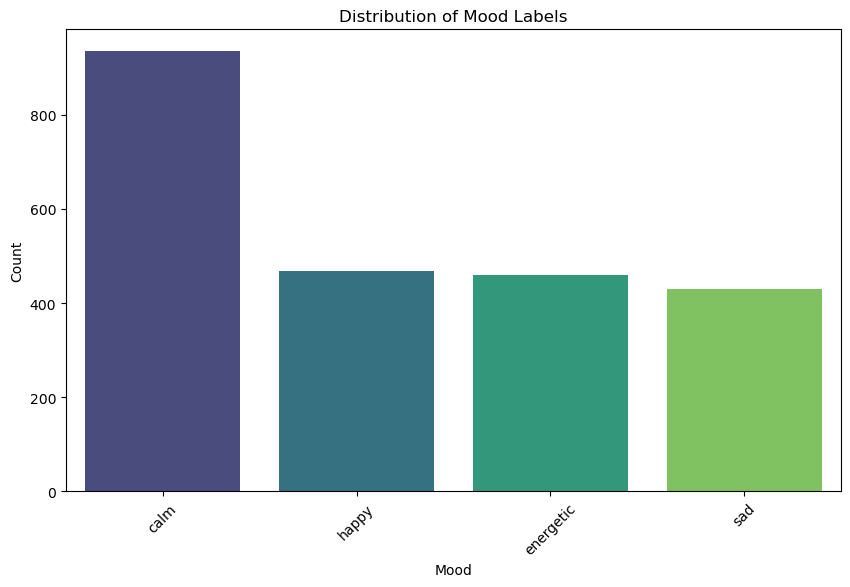

In [12]:
# Count the occurrences of each unique mood
mood_counts = df_moods['mood'].value_counts()
print(mood_counts)
# Plot the distribution of the 'mood' labels
plt.figure(figsize=(10, 6))  # You can adjust the size as needed
sns.barplot(x=mood_counts.index, y=mood_counts.values, palette='viridis')
plt.title('Distribution of Mood Labels')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.show()

## 2. Pre-process our df_main for labeling

In [13]:
# Rename and reorder columns in df_moods_2 to match df_moods
df_main_cleaned = df_main.drop(columns=['artists_uris', 'playlist_uris', 'release_date', 'artists_genres', 'key', 'album_type', 'is_playable', 'analysis_url', 'artists_popularities', 'mode', 'popularity', 'artists_followers'], inplace=False)


df_main_cleaned.rename(columns={
    'track_uri': 'id',
    'duration_ms': 'length',
    'artists_names': 'artist' 
}, inplace=True)

df_main_cleaned['time_signature'] = df_main_cleaned['time_signature'].astype('Int64')
df_main_cleaned['length'] = df_main_cleaned['length'].astype('Int64')
df_main_cleaned.head()



,id,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,length,time_signature
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,195000,4
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,194641,4
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,217573,4
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,443478,4
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,225862,4


In [14]:
# Check if the all columns except mood match
# Get lists of columns
columns_df_moods = set(df_moods.columns)
columns_df_main_cleaned = set(df_main_cleaned.columns)

# Find common columns
common_columns = columns_df_moods.intersection(columns_df_main_cleaned)

# Find unique columns
unique_to_df_moods = columns_df_moods.difference(columns_df_main_cleaned)
unique_to_df_main_cleaned = columns_df_main_cleaned.difference(columns_df_moods)

# Print results
print("Common columns:", common_columns)
print("Columns unique to df_moods:", unique_to_df_moods)
print("Columns unique to df_main_cleaned:", unique_to_df_main_cleaned)

Common columns: {'liveness', 'loudness', 'valence', 'danceability', 'tempo', 'id', 'length', 'name', 'speechiness', 'artist', 'energy', 'acousticness', 'time_signature', 'instrumentalness'}
Columns unique to df_moods: {'mood'}
Columns unique to df_main_cleaned: set()


In [15]:
# Re-order the colummns in df_main_cleaned
new_column_order = ['name', 'artist', 'id', 'length', 'danceability', 'acousticness',
       'energy', 'instrumentalness', 'liveness', 'valence', 'loudness',
       'speechiness', 'tempo', 'time_signature']

df_main_cleaned = df_main_cleaned[new_column_order]

In [16]:
df_main_cleaned.head()

,name,artist,id,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,time_signature
0,Way Up (feat. Ava Re),['Floduxe'],spotify:track:3v6sBj3swihU8pXQQHhDZo,195000,0.611,0.0169,0.614,0.000794,0.7530,0.520,-8.815,0.0672,128.050,4
1,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",spotify:track:7KCWmFdw0TzoJbKtqRRzJO,194641,0.638,0.0118,0.781,0.009530,0.3490,0.250,-6.848,0.0285,122.985,4
2,Try Me,['DeJ Loaf'],spotify:track:2CY92qejUrhyPUASawNVRr,217573,0.560,0.0071,0.810,0.000008,0.2410,0.247,-8.029,0.0872,170.044,4
3,Walk on by (Sound Remedy Remix),['Noosa'],spotify:track:11BPfwVbB7vok7KfjBeW4k,443478,0.525,0.0178,0.699,0.000088,0.0888,0.199,-4.571,0.0353,92.011,4
4,Pretty Wings,"['Zak Waters', 'Pretty Sister']",spotify:track:3yUJKPsjvThlcQWTS9ttYx,225862,0.367,0.3650,0.771,0.000001,0.0965,0.163,-5.863,0.1060,115.917,4


In [17]:
df_moods.head()

,name,artist,id,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,time_signature,mood
0,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,4,happy
1,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,4,sad
2,9 Crimes,Damien Rice,5GZEeowhvSieFDiR8fQ2im,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,4,sad
3,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,happy
4,A Boy Brushed Red Living In Black And White,Underoath,47IWLfIKOKhFnz1FUEUIkE,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,4,energetic


In [18]:
df_main_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              277923 non-null  object 
 1   artist            277938 non-null  object 
 2   id                277938 non-null  object 
 3   length            277938 non-null  Int64  
 4   danceability      277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   energy            277938 non-null  float64
 7   instrumentalness  277938 non-null  float64
 8   liveness          277938 non-null  float64
 9   valence           277938 non-null  float64
 10  loudness          277938 non-null  float64
 11  speechiness       277938 non-null  float64
 12  tempo             277938 non-null  float64
 13  time_signature    277938 non-null  Int64  
dtypes: Int64(2), float64(9), object(3)
memory usage: 30.2+ MB


In [19]:
df_moods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2293 non-null   object 
 1   artist            2293 non-null   object 
 2   id                2293 non-null   object 
 3   length            2293 non-null   int64  
 4   danceability      2293 non-null   float64
 5   acousticness      2293 non-null   float64
 6   energy            2293 non-null   float64
 7   instrumentalness  2293 non-null   float64
 8   liveness          2293 non-null   float64
 9   valence           2293 non-null   float64
 10  loudness          2293 non-null   float64
 11  speechiness       2293 non-null   float64
 12  tempo             2293 non-null   float64
 13  time_signature    2293 non-null   int64  
 14  mood              2293 non-null   object 
dtypes: float64(9), int64(2), object(4)
memory usage: 268.8+ KB


### 2.1 PCA on the large dataset

## 3. Implementation of the classifiers

### 3.1 Training data preprocessing

In [20]:
X = df_moods.drop(columns=['name', 'artist', 'id', 'mood'], axis=1)
y = df_moods['mood']
X.head()

,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,time_signature
0,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,4
1,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,4
2,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,4
3,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4
4,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,4


In [21]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 3.13522114,  1.78862425, -0.78738041, ..., -0.02768227,
         0.07336351,  0.20273336],
       [ 2.12002465, -1.3900204 , -1.11610261, ..., -0.36772485,
         0.13057178,  0.20273336],
       [ 0.4267321 , -1.61940713,  1.37255544, ..., -0.57916951,
         0.65618101,  0.20273336],
       ...,
       [ 0.91072425, -0.24308676,  0.32320516, ...,  2.86948051,
         0.24994285,  0.20273336],
       [ 0.06251655, -1.11475633, -0.20286169, ..., -0.56804084,
         0.81165406,  0.20273336],
       [ 1.68349654, -0.24964067, -0.53687239, ..., -0.44315247,
         1.7671841 ,  0.20273336]])

In [22]:
# Encode the 'mood' labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

### 3.2 Random Forest

In [23]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the moods on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print out the accuracy and detailed classification report
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(classification_rep)

Accuracy: 73.42%
Classification Report:
              precision    recall  f1-score   support

        calm       0.88      0.86      0.87       180
   energetic       0.69      0.72      0.71       100
       happy       0.56      0.56      0.56        90
         sad       0.68      0.69      0.68        89

    accuracy                           0.73       459
   macro avg       0.70      0.70      0.70       459
weighted avg       0.74      0.73      0.73       459



### 3.2.1 RF Hyperparameter Tunning

In [24]:
# # Hyperparameter tunning
# # Define the hyperparameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
#     'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
# }

# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)


In [25]:
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)
# best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# # Perform cross-validation and then calculate the mean and standard deviation of the cross-validation scores
# cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)

# print("Cross-validation scores:", cv_scores)
# print("Mean CV score:", cv_scores.mean())
# print("Standard deviation in CV scores:", cv_scores.std())

In [26]:
# #Hyperparameter tunning using RandomizedSearchCV instead of GridSearchCV
# # Define the parameter distribution rather than a parameter grid
# param_dist_rf = {
#     "n_estimators": sp_randint(100, 600),
#     "max_depth": [None] + list(sp_randint(3, 20).rvs(size=10)),
#     "min_samples_split": sp_randint(2, 11),
#     "min_samples_leaf": sp_randint(1, 11),
#     "bootstrap": [True, False],
#     "criterion": ["gini", "entropy"]
# }

# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize the RandomizedSearchCV object with 100 iterations and 5-fold cross-validation.
# rnd_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=100, cv=5, 
#                                    verbose=2, random_state=42, n_jobs=-1)

# # Fit the RandomizedSearchCV object to the data - this will take some time
# rnd_search_rf.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best parameters found: ", rnd_search_rf.best_params_)
# print("Best score: ", rnd_search_rf.best_score_)


In [27]:
# # Retrieve the best estimator found by RandomizedSearchCV
# best_rf = rnd_search_rf.best_estimator_

# # Perform cross-validation and print each fold score
# cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

# print("Cross-validation scores:", cv_scores)
# print("Mean CV Score:", cv_scores.mean())

### 3.3. Logistic Regression


In [28]:
# # Initialize the Logistic Regression model
# log_reg = LogisticRegression(max_iter=1000, random_state=42)

# # Train the model
# log_reg.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = log_reg.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy*100:.2f}%")

# # Detailed classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [29]:
# # Hyperparameter Tunning

# # Define the parameter grid
# param_grid_lr = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2']
# }

# # Initialize the classifier
# lr_hyperparameter = LogisticRegression(random_state=42, solver='liblinear') # solver must support the penalty

# # Initialize the GridSearchCV object
# grid_search_lr = GridSearchCV(estimator=lr_hyperparameter, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search_lr.fit(X_train, y_train)

# # Best parameters
# print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


In [30]:
# # Initialize the Logistic Regression model with the best hyperparameters
# log_reg = LogisticRegression(C=0.1, penalty='l1', max_iter=1000, random_state=42, solver='liblinear')

# # Train the model
# log_reg.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = log_reg.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy*100:.2f}%")

# # Detailed classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


### 3.4. SVM

In [31]:
# # Initialize the SVM model
# svm_model = SVC(kernel='linear', random_state=42)

# # Train the model on the training dataset
# svm_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_model.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy*100:.2f}%")

# # Generate a classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [32]:
# # Define the parameter grid
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# # Initialize the classifier
# svm_hyperparameter = SVC(random_state=42)

# # Initialize the GridSearchCV object
# grid_search_svm = GridSearchCV(estimator=svm_hyperparameter, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search_svm.fit(X_train, y_train)

# # Best parameters
# print("Best parameters for SVM:", grid_search_svm.best_params_)


In [33]:
# # Initialize the SVM model
# svm_model = SVC(kernel='linear', random_state=42)

# # Train the model on the training dataset
# svm_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_model.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy*100:.2f}%")

# # Generate a classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [34]:
# # Initialize the SVM model with the best hyperparameters
# svm_model = SVC(C=1, gamma='auto', kernel='rbf', random_state=42)

# # Train the model on the training dataset
# svm_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_model.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy*100:.2f}%")

# # Generate a classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


### 3.5. XGBoost

In [35]:
# # Initialize the XGBoost classifier
# xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# # Train the model
# xgb_clf.fit(X_train, y_train)

# # Predictions
# y_pred = xgb_clf.predict(X_test)

# # Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy*100:.2f}%")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [36]:
# # Parameter grid for XGBoost
# params = {
#     'n_estimators': np.arange(50, 400, 50),
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': np.arange(3, 10, 2),
#     'colsample_bytree': [0.3, 0.7, 1],
#     'gamma': [0, 0.1, 0.2, 0.5]
# }

# # Initialize the XGBoost classifier
# xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# # Initialize RandomizedSearchCV
# rnd_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)

# # Fit RandomizedSearchCV
# rnd_search_xgb.fit(X_train, y_train)

# # Best parameters and score
# print("Best parameters found: ", rnd_search_xgb.best_params_)
# print("Best score: ", rnd_search_xgb.best_score_)


In [37]:
# # Predictions with the tuned model
# best_xgb = rnd_search_xgb.best_estimator_
# y_pred_tuned = best_xgb.predict(X_test)

# # Evaluation
# accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
# print(f"Accuracy of the tuned model: {accuracy_tuned*100:.2f}%")
# print(classification_report(y_test, y_pred_tuned, target_names=label_encoder.classes_))


## 4. Label the our large dataset with our best classifier

All 4 models we tested perform very similarly. We choose random forest since it is robust and also it perform slightly better than the other models

In [38]:
X_df1 = df_main_cleaned.drop(columns=['name', 'artist', 'id'])
# Feature scaling
scaler = StandardScaler()
X_df1_scaled = scaler.fit_transform(X_df1)
X_df1_scaled.shape

(277938, 11)

In [39]:
# Your best model parameters
best_params = {
    'bootstrap': True,
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Instantiate the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Assuming X_train and y_train are your full training dataset and labels
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=42)

In [40]:
# Predicting moods
predicted_moods = best_rf_model.predict(X_df1_scaled)
# Assuming your predictions are stored in `predicted_moods`
predicted_moods = label_encoder.inverse_transform(predicted_moods)

# Adding the predicted moods to your DataFrame
df_main['predicted_mood'] = predicted_moods

In [47]:
# Output the first few rows to verify
df_main_sorted_by_popularity = df_main.sort_values(by=['popularity'], ascending=False)
# df_main_sorted_by_popularity.info()
df_main_sorted_by_popularity[['name','popularity', 'artists_names','predicted_mood']].head(50)

,name,popularity,artists_names,predicted_mood
261193,Flowers,100,['Miley Cyrus'],energetic
226293,"Shakira: Bzrp Music Sessions, Vol. 53",96,"['Bizarrap', 'Shakira']",happy
138524,TQG,96,['KAROL G'],calm
274024,Boy's a liar Pt. 2,96,"['PinkPantheress', 'Ice Spice']",happy
269682,Die For You - Remix,95,"['The Weeknd', 'Ariana Grande']",calm
260639,Calm Down (with Selena Gomez),94,"['Rema', 'Selena Gomez']",happy
266216,I'm Good (Blue),94,"['David Guetta', 'Bebe Rexha']",energetic
269098,Here With Me,93,['d4vd'],sad
109517,Anti-Hero,93,['Taylor Swift'],happy
193140,La Bachata,93,['Manuel Turizo'],happy


In [46]:
df_main_sorted_by_popularity.to_csv('labeled_main_dataset.csv')